# Capstone Project (real title to come later)
### Ryan Khaleghi and Kevin Cannon

## Introduction


We

## Data

The dataset 

There are 8 ratings in the dataset: overall, value, rooms, location, cleanliness, check in/front desk, service, and business service. These are rated from 0-5 stars, with missing ratings indicated by -1.

In [1]:
import pandas as pd
import numpy as np
import glob
import tripadvisor_convert
import dill

#save session
#dill.dump_session('notebook_env.db')

#load session
dill.load_session('notebook_env.db')

#json_file = '/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json_copy/73739.json'
#json_file = '/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json/3256888.json'
#df = tripadvisor_convert.to_df(json_file)
#print(df.head(2))


In [2]:
from timeit import default_timer as timer #for timing

start = timer()
#load data
#path ='/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json_copy' # use your path
path ='/Users/Ryan/Desktop/Programming/SMU/Capstone/TripAdvisor/json' # use your path
allFiles = glob.glob(path + "/*.json")
#print(allFiles)
randFiles = np.random.choice(allFiles, 500, False)
df = pd.DataFrame()
df_reviews = pd.DataFrame()
list_ = []

for file_ in randFiles:
    try:
        df = tripadvisor_convert.to_df(file_)
    except Exception:
        pass 
    list_.append(df)
    df_reviews = pd.concat(list_)
print(df_reviews.head(2))
end = timer()
print (end - start)
print(len(df_reviews))


             Author AuthorLocation Business service (e.g., internet access)  \
UR124988753  jnegri      Argentina                                      NaN   
UR122180520   Cru22                                                     NaN   

            Check in / front desk Cleanliness               Date  \
UR124988753                   NaN           5  February 21, 2012   
UR122180520                   NaN           5  December 28, 2011   

                                          Hotel  HotelID HotelLocation  \
UR124988753  Staybridge Suites Miami Doral Area   195791            FL   
UR122180520  Staybridge Suites Miami Doral Area   195791            FL   

            Location Overall  PriceMax  PriceMin Rooms Service Sleep Quality  \
UR124988753        3     4.0       220       125     4       5             4   
UR122180520        5     5.0       220       125     5       5           NaN   

            Value  
UR124988753     5  
UR122180520     5  
486.9114172690024
72646


### EDA
Here we will explore the data.

In [3]:
df_reviews.dtypes

Author                                      object
AuthorLocation                              object
Business service (e.g., internet access)    object
Check in / front desk                       object
Cleanliness                                 object
Date                                        object
Hotel                                       object
HotelID                                      int64
HotelLocation                               object
Location                                    object
Overall                                     object
PriceMax                                     int64
PriceMin                                     int64
Rooms                                       object
Service                                     object
Sleep Quality                               object
Value                                       object
dtype: object

In [4]:
#deal with missing numbers
df_reviews.fillna(0, inplace = True)
#df_reviews.isnull()

In [5]:
#convert ratings into numbers instead of objects
df_reviews = df_reviews.astype({'Cleanliness': 'int64', 'Location': 'int64', 'Rooms': 'int64', 'Service': 'int64', \
                   'Sleep Quality': 'int64', 'Value': 'int64', 'Business service (e.g., internet access)': 'int64', \
                  'Check in / front desk': 'int64', 'Overall': 'float'})
df_reviews.dtypes

Author                                       object
AuthorLocation                               object
Business service (e.g., internet access)      int64
Check in / front desk                         int64
Cleanliness                                   int64
Date                                         object
Hotel                                        object
HotelID                                       int64
HotelLocation                                object
Location                                      int64
Overall                                     float64
PriceMax                                      int64
PriceMin                                      int64
Rooms                                         int64
Service                                       int64
Sleep Quality                                 int64
Value                                         int64
dtype: object

In [6]:
df_reviews.describe([.01, .05, .25, .5, .75, .95, .99])

,"Business service (e.g., internet access)",Check in / front desk,Cleanliness,HotelID,Location,Overall,PriceMax,PriceMin,Rooms,Service,Sleep Quality,Value
count,72646.000000,72646.000000,72646.000000,7.264600e+04,72646.000000,72646.000000,72646.000000,72646.000000,72646.000000,72646.000000,72646.000000,72646.000000
mean,0.393208,0.714065,3.652658,8.823511e+05,3.324904,3.786334,332.149052,156.328401,3.056232,3.585662,1.994976,3.455579
std,1.181003,1.588297,1.642745,1.083306e+06,2.018935,1.275755,352.873866,147.981299,1.844447,1.670061,2.180142,1.649425
min,0.000000,0.000000,0.000000,7.364400e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1%,0.000000,0.000000,0.000000,7.394300e+04,0.000000,1.000000,20.000000,16.000000,0.000000,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000,8.021900e+04,0.000000,1.000000,82.000000,45.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,3.000000,8.808700e+04,1.000000,3.000000,150.000000,91.000000,1.000000,3.000000,0.000000,3.000000
50%,0.000000,0.000000,4.000000,1.857470e+05,4.000000,4.000000,309.000000,152.000000,4.000000,4.000000,0.000000,4.000000
75%,0.000000,0.000000,5.000000,2.514425e+06,5.000000,5.000000,432.000000,191.000000,5.000000,5.000000,4.000000,5.000000
95%,4.000000,5.000000,5.000000,2.515580e+06,5.000000,5.000000,664.000000,302.000000,5.000000,5.000000,5.000000,5.000000


In [7]:
# Remove date attribute that isn't going to be used in the analysis
df_reviews = df_reviews.drop(['Date'], axis = 1)
print(df_reviews.head(2))

             Author AuthorLocation  Business service (e.g., internet access)  \
UR124988753  jnegri      Argentina                                         0   
UR122180520   Cru22                                                        0   

             Check in / front desk  Cleanliness  \
UR124988753                      0            5   
UR122180520                      0            5   

                                          Hotel  HotelID HotelLocation  \
UR124988753  Staybridge Suites Miami Doral Area   195791            FL   
UR122180520  Staybridge Suites Miami Doral Area   195791            FL   

             Location  Overall  PriceMax  PriceMin  Rooms  Service  \
UR124988753         3      4.0       220       125      4        5   
UR122180520         5      5.0       220       125      5        5   

             Sleep Quality  Value  
UR124988753              4      5  
UR122180520              0      5  


In [8]:
df_reviews.rename(index=str, columns={"Business service (e.g., internet access)": "BusServ", \
                                     "Check in / front desk": "CheckIn"}, inplace= True)
print(df_reviews.head(2))

             Author AuthorLocation  BusServ  CheckIn  Cleanliness  \
UR124988753  jnegri      Argentina        0        0            5   
UR122180520   Cru22                       0        0            5   

                                          Hotel  HotelID HotelLocation  \
UR124988753  Staybridge Suites Miami Doral Area   195791            FL   
UR122180520  Staybridge Suites Miami Doral Area   195791            FL   

             Location  Overall  PriceMax  PriceMin  Rooms  Service  \
UR124988753         3      4.0       220       125      4        5   
UR122180520         5      5.0       220       125      5        5   

             Sleep Quality  Value  
UR124988753              4      5  
UR122180520              0      5  


In [9]:
#what to do with missing values, now set to zero?
#set missing values to overall rating doesn't seem crazy, since it's the average of other ratings
#need to change from int64 to float64 because overall is a float
df_reviews = df_reviews.astype({'Cleanliness': 'float', 'Location': 'float', 'Rooms': 'float', 'Service': 'float', \
                   'Sleep Quality': 'float', 'Value': 'float', 'BusServ': 'float', 'CheckIn': 'float'})
df_reviews.dtypes


Author             object
AuthorLocation     object
BusServ           float64
CheckIn           float64
Cleanliness       float64
Hotel              object
HotelID             int64
HotelLocation      object
Location          float64
Overall           float64
PriceMax            int64
PriceMin            int64
Rooms             float64
Service           float64
Sleep Quality     float64
Value             float64
dtype: object

In [10]:
#now we can assign values
df_reviews['BusServ'] = np.where(df_reviews['BusServ'] == 0, df_reviews['Overall'], df_reviews['BusServ'])
df_reviews['CheckIn'] = np.where(df_reviews['CheckIn'] == 0, df_reviews['Overall'], df_reviews['CheckIn'])
df_reviews['Cleanliness'] = np.where(df_reviews['Cleanliness'] == 0, df_reviews['Overall'], df_reviews['Cleanliness'])
df_reviews['Location'] = np.where(df_reviews['Location'] == 0, df_reviews['Overall'], df_reviews['Location'])
df_reviews['Rooms'] = np.where(df_reviews['Rooms'] == 0, df_reviews['Overall'], df_reviews['Rooms'])
df_reviews['Service'] = np.where(df_reviews['Service'] == 0, df_reviews['Overall'], df_reviews['Service'])
df_reviews['Sleep Quality'] = np.where(df_reviews['Sleep Quality'] == 0, df_reviews['Overall'], df_reviews['Sleep Quality'])
df_reviews['Value'] = np.where(df_reviews['Value'] == 0, df_reviews['Overall'], df_reviews['Value'])
df_reviews.describe([.01, .05, .25, .5, .75, .95, .99])


,BusServ,CheckIn,Cleanliness,HotelID,Location,Overall,PriceMax,PriceMin,Rooms,Service,Sleep Quality,Value
count,72646.000000,72646.000000,72646.000000,7.264600e+04,72646.000000,72646.000000,72646.000000,72646.000000,72646.000000,72646.000000,72646.000000,72646.000000
mean,3.770311,3.837156,3.982601,8.823511e+05,4.185557,3.786334,332.149052,156.328401,3.738279,3.913512,3.813204,3.781585
std,1.272211,1.253583,1.234409,1.083306e+06,1.099563,1.275755,352.873866,147.981299,1.283036,1.284070,1.296847,1.298927
min,1.000000,1.000000,1.000000,7.364400e+04,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
1%,1.000000,1.000000,1.000000,7.394300e+04,1.000000,1.000000,20.000000,16.000000,1.000000,1.000000,1.000000,1.000000
5%,1.000000,1.000000,1.000000,8.021900e+04,2.000000,1.000000,82.000000,45.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,8.808700e+04,4.000000,3.000000,150.000000,91.000000,3.000000,3.000000,3.000000,3.000000
50%,4.000000,4.000000,4.000000,1.857470e+05,5.000000,4.000000,309.000000,152.000000,4.000000,4.000000,4.000000,4.000000
75%,5.000000,5.000000,5.000000,2.514425e+06,5.000000,5.000000,432.000000,191.000000,5.000000,5.000000,5.000000,5.000000
95%,5.000000,5.000000,5.000000,2.515580e+06,5.000000,5.000000,664.000000,302.000000,5.000000,5.000000,5.000000,5.000000


<IPython.core.display.Javascript object>


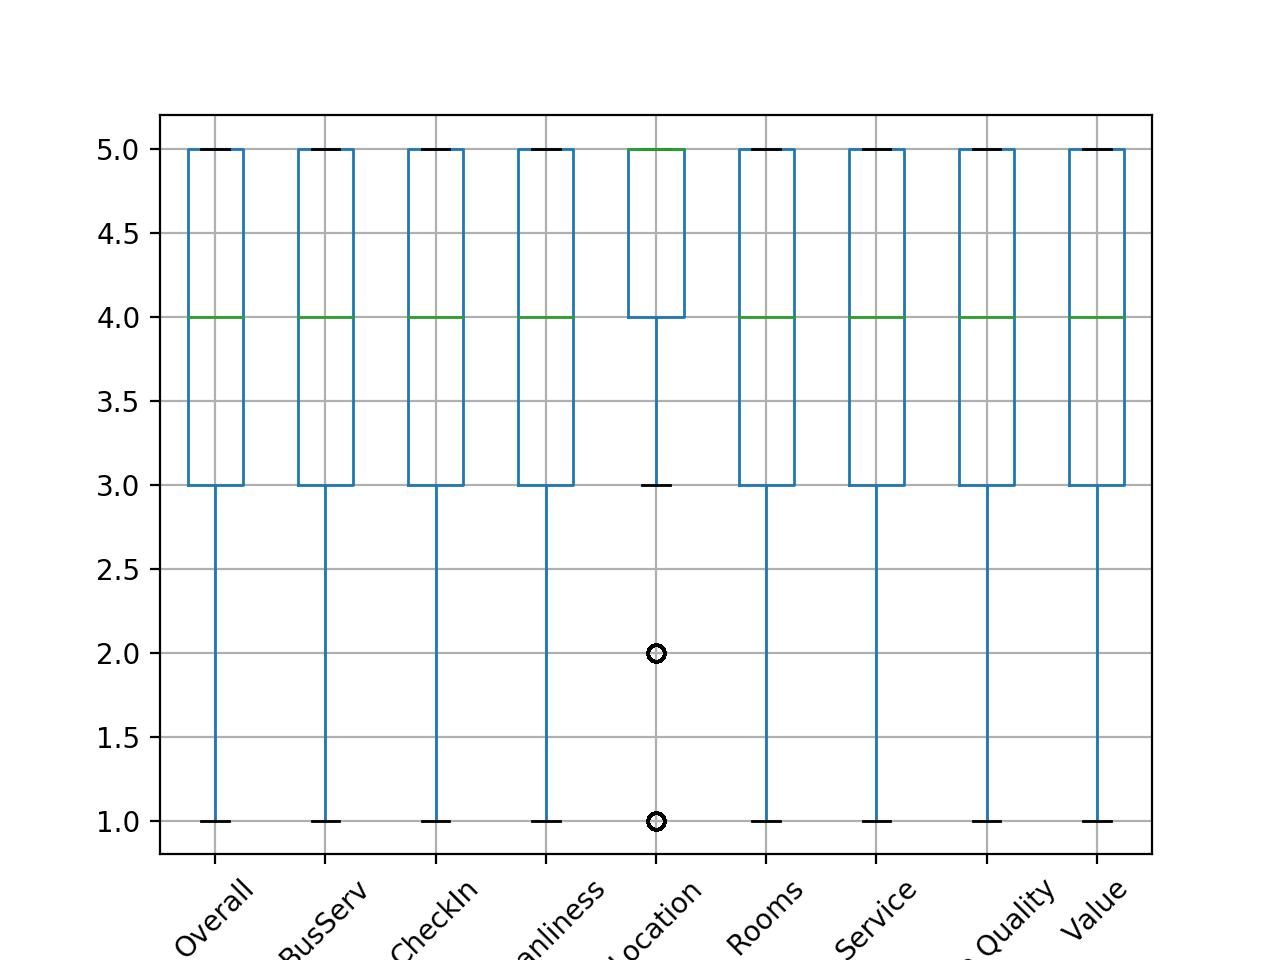

In [14]:
%matplotlib notebook
import matplotlib.pyplot as plt
df_reviews.boxplot(column=['Overall', 'BusServ', 'CheckIn', 'Cleanliness', 'Location', 'Rooms', 'Service', \
                           'Sleep Quality', 'Value'])
plt.xticks(rotation=45)
plt.show()



As we see above, 

## Collaborative Filtering

Now that we have the data in and examined, we begin the collaborative filtering recommender system.

In [17]:
#graphlab is deprecated so we are using turi create from Apple
#make Sframe out of pandas dataframe
import turicreate as tc
from turicreate import SFrame
sf_reviews = SFrame(data=df_reviews)
sf.show()


Materializing SFrame

/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-10-13 16:20:29.854930. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [25]:
#train test split
#this is for now, we will likely use specific usernames later to test
training_data, validation_data = tc.recommender.util.random_split_by_user(sf_reviews, user_id='Author', item_id='Hotel')


/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-10-18 17:50:16.203683. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [26]:
#collaborative filtering model
model = tc.item_similarity_recommender.create(training_data, user_id='Author', item_id='Hotel', target="Overall")
model.save("collab.model")
#model = tc.load_model("collab.model")


Recsys training: model = item_similarity

Warning: Ignoring columns AuthorLocation, BusServ, CheckIn, Cleanliness, HotelID, HotelLocation, Location, PriceMax, PriceMin, Rooms, Service, Sleep Quality, Value;

To use these columns in scoring predictions, use a model that allows the use of additional features.

Preparing data set.

Data has 72206 observations with 27404 users and 176 items.

Data prepared in: 0.135695s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 1.747ms                        | 3.5        |

| 14.077ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 21.312ms                            | 0                | 0               |

| 29.574ms                            | 100              | 176             |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 0.041306s

/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-10-18 17:50:23.959081. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [27]:
recs = model.recommend()

recommendations finished on 1000/27404 queries. users per second: 134174

recommendations finished on 2000/27404 queries. users per second: 128148

recommendations finished on 3000/27404 queries. users per second: 157315

recommendations finished on 4000/27404 queries. users per second: 172563

recommendations finished on 5000/27404 queries. users per second: 175611

recommendations finished on 6000/27404 queries. users per second: 189735

recommendations finished on 7000/27404 queries. users per second: 202003

recommendations finished on 8000/27404 queries. users per second: 212823

recommendations finished on 9000/27404 queries. users per second: 214869

recommendations finished on 10000/27404 queries. users per second: 220946

recommendations finished on 11000/27404 queries. users per second: 227979

recommendations finished on 12000/27404 queries. users per second: 235220

recommendations finished on 13000/27404 queries. users per second: 238401

recommendations finished on 14000/27404 queries. users per second: 235889

recommendations finished on 15000/27404 queries. users per second: 237394

recommendations finished on 16000/27404 queries. users per second: 241062

recommendations finished on 17000/27404 queries. users per second: 239379

recommendations finished on 18000/27404 queries. users per second: 240581

recommendations finished on 19000/27404 queries. users per second: 242331

recommendations finished on 20000/27404 queries. users per second: 229032

recommendations finished on 21000/27404 queries. users per second: 228484

recommendations finished on 22000/27404 queries. users per second: 228145

recommendations finished on 23000/27404 queries. users per second: 221316

recommendations finished on 24000/27404 queries. users per second: 209371

recommendations finished on 25000/27404 queries. users per second: 204770

recommendations finished on 26000/27404 queries. users per second: 201069

recommendations finished on 27000/27404 queries. users per second: 196820

/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-10-18 17:51:01.695740. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [29]:
#factorization model
model2 = tc.ranking_factorization_recommender.create(training_data, user_id='Author', item_id='Hotel', target="Overall")
model2.save("factor.model")
#model2 = tc.load_model("factor.model")


Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 72206 observations with 27404 users and 176 items.

Data prepared in: 0.301847s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 32       |

| regularization                 | L2 Regularization on Factors                     | 1e-09    |

| solver                         | Solver used for training                         | adagrad  |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 10000 / 72206 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 3.33333           | Not Viable                               |

| 1       | 0.833333          | Not Viable                               |

| 2       | 0.208333          | Not Viable                               |

| 3       | 0.0520833         | Not Viable                               |

| 4       | 0.0130208         | Not Viable                               |

| 5       | 0.00325521        | Not Viable                               |

| 6       | 0.000813802       | Not Viable                               |

| 7       | 0.000203451       | No Decrease (14.2347 >= 3.17731)         |

| 8       | 5.08626e-05       | No Decrease (3.8005 >= 3.17731)          |

| 9       | 1.27157e-05       | 3.16722                                  |

| 10      | 6.35783e-06       | 3.16055                                  |

| 11      | 3.17891e-06       | 3.16602                                  |

| 12      | 1.58946e-06       | 3.17092                                  |

| 13      | 7.94729e-07       | 3.17393                                  |

+---------+-------------------+------------------------------------------+

| Final   | 6.35783e-06       | 3.16055                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 104us        | 3.19419           | 1.27666               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 701.818ms    | 3.12356           | 1.27016               | 6.35783e-06 |

| 2       | 1.42s        | 3.12158           | 1.26702               | 6.35783e-06 |

| 3       | 2.06s        | 3.12584           | 1.26631               | 6.35783e-06 |

| 4       | 2.71s        | 3.13272           | 1.26627               | 6.35783e-06 |

| 5       | 3.36s        | 3.14112           | 1.26698               | 6.35783e-06 |

| 10      | 6.55s        | 3.20203           | 1.2767                | 6.35783e-06 |

| 15      | 10.04s       | DIVERGED          | DIVERGED              | 6.35783e-06 |

| RESET   | 10.36s       | 3.19095           | 1.27532               |             |

| 1       | 11.12s       | 3.1255            | 1.27161               | 3.17891e-06 |

| 5       | 14.40s       | 3.11717           | 1.26602               | 3.17891e-06 |

| 10      | 17.75s       | 3.12204           | 1.26441               | 3.17891e-06 |

| 15      | 20.83s       | 3.13301           | 1.26483               | 3.17891e-06 |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached (hard limit).

Computing final objective value and training RMSE.

Final objective value: 3.1918

Final training RMSE: 1.26491

/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-10-18 17:53:31.066724. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [30]:
recs2 = model2.recommend()

recommendations finished on 1000/27404 queries. users per second: 19486

recommendations finished on 2000/27404 queries. users per second: 23182.8

recommendations finished on 3000/27404 queries. users per second: 22429.9

recommendations finished on 4000/27404 queries. users per second: 21268.5

recommendations finished on 5000/27404 queries. users per second: 20900.1

recommendations finished on 6000/27404 queries. users per second: 20659.7

recommendations finished on 7000/27404 queries. users per second: 20713.1

recommendations finished on 8000/27404 queries. users per second: 20824.4

recommendations finished on 9000/27404 queries. users per second: 21031.8

recommendations finished on 10000/27404 queries. users per second: 21173.8

recommendations finished on 11000/27404 queries. users per second: 21237.7

recommendations finished on 12000/27404 queries. users per second: 21108.7

recommendations finished on 13000/27404 queries. users per second: 21191.2

recommendations finished on 14000/27404 queries. users per second: 21256.6

recommendations finished on 15000/27404 queries. users per second: 21338.5

recommendations finished on 16000/27404 queries. users per second: 21298.5

recommendations finished on 17000/27404 queries. users per second: 21279

recommendations finished on 18000/27404 queries. users per second: 21324.6

recommendations finished on 19000/27404 queries. users per second: 21342.8

recommendations finished on 20000/27404 queries. users per second: 21315.1

recommendations finished on 21000/27404 queries. users per second: 20970.6

recommendations finished on 22000/27404 queries. users per second: 21060.4

recommendations finished on 23000/27404 queries. users per second: 20993.8

recommendations finished on 24000/27404 queries. users per second: 20957.2

recommendations finished on 25000/27404 queries. users per second: 21024.6

recommendations finished on 26000/27404 queries. users per second: 21051.8

recommendations finished on 27000/27404 queries. users per second: 21077.7

/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-10-18 17:53:59.253276. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [31]:
tc.recommender.util.compare_models(validation_data, [model, model2], model_names=["Collab","Factorization"])

PROGRESS: Evaluate model Collab

Precision and recall summary statistics by cutoff
+--------+-------------+----------------+
| cutoff | mean_recall | mean_precision |
+--------+-------------+----------------+
|   1    |     0.0     |      0.0       |
|   2    |     0.0     |      0.0       |
|   3    |     0.0     |      0.0       |
|   4    |     0.0     |      0.0       |
|   5    |     0.0     |      0.0       |
|   6    |     0.0     |      0.0       |
|   7    |     0.0     |      0.0       |
|   8    |     0.0     |      0.0       |
|   9    |     0.0     |      0.0       |
|   10   |     0.0     |      0.0       |
+--------+-------------+----------------+
[10 rows x 3 columns]


Overall RMSE: 4.041664028200351

Per User RMSE (best)
+-----------+-------+-------------------+
|   Author  | count |        rmse       |
+-----------+-------+-------------------+
| 20lucky20 |   1   | 0.999075939655304 |
+-----------+-------+-------------------+
[1 rows x 3 columns]


Per User RMSE (wor

[{'precision_recall_by_user': Columns:
  	Author	str
  	cutoff	int
  	precision	float
  	recall	float
  	count	int
  
  Rows: 6192
  
  Data:
  +---------+--------+-----------+--------+-------+
  |  Author | cutoff | precision | recall | count |
  +---------+--------+-----------+--------+-------+
  | 0906ret |   1    |    0.0    |  0.0   |   3   |
  | 0906ret |   2    |    0.0    |  0.0   |   3   |
  | 0906ret |   3    |    0.0    |  0.0   |   3   |
  | 0906ret |   4    |    0.0    |  0.0   |   3   |
  | 0906ret |   5    |    0.0    |  0.0   |   3   |
  | 0906ret |   6    |    0.0    |  0.0   |   3   |
  | 0906ret |   7    |    0.0    |  0.0   |   3   |
  | 0906ret |   8    |    0.0    |  0.0   |   3   |
  | 0906ret |   9    |    0.0    |  0.0   |   3   |
  | 0906ret |   10   |    0.0    |  0.0   |   3   |
  +---------+--------+-----------+--------+-------+
  [6192 rows x 5 columns]
  Note: Only the head of the SFrame is printed.
  You can use print_rows(num_rows=m, num_columns=n) to p

/Users/Ryan/anaconda/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2018-10-18 17:58:10.806205. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)
